# Import Statements

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, KFold
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform, randint

# Importing the main dataframe

In [188]:
data = pd.read_csv('merged_df10.csv') 

In [189]:
data.shape

(6209, 36)

In [190]:
data.head()

,Area,Year,TotalExportValue_Crops,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock,Exchange_Value_Exchange_Rate,Crops total (Emissions CH4) All Crops,Crops total (Emissions N2O) All Crops,"Consumer Prices, Food Indices (2015 = 100)",...,Agriculture,Permanent crops,Permanent meadows and pastures,Fungicides and Bactericides_Agricultural Use,Herbicides_Agricultural Use,Insecticides_Agricultural Use,Pesticides (total)_Agricultural Use,Pesticides (total)_Use per area of cropland,Pesticides (total)_Use per value of agricultural production,Rodenticides_Agricultural Use
0,Afghanistan,1991,98243000.0,125520000.0,0.0,4793000.0,50.599605,NaN,NaN,NaN,...,38030000.0,120000.0,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1992,42112000.0,128605000.0,0.0,4960000.0,50.599605,NaN,NaN,NaN,...,38030000.0,120000.0,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1993,44564000.0,132076000.0,0.0,4120000.0,50.599605,NaN,NaN,NaN,...,37934000.0,110000.0,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1994,50357000.0,112377000.0,0.0,3820000.0,425.099934,NaN,NaN,NaN,...,37813000.0,110000.0,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1995,49596000.0,213741000.0,0.0,1670000.0,833.333333,NaN,NaN,NaN,...,37763000.0,110000.0,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
data.isnull().mean() * 100

Area                                                                                     0.000000
Year                                                                                     0.000000
TotalExportValue_Crops                                                                   0.000000
TotalImportValue_Crops                                                                   0.000000
TotalExportValue_Livestock                                                               0.000000
TotalImportValue_Livestock                                                               0.000000
Exchange_Value_Exchange_Rate                                                             6.748269
Crops total (Emissions CH4) All Crops                                                   35.029795
Crops total (Emissions N2O) All Crops                                                   33.966822
Consumer Prices, Food Indices (2015 = 100)                                              32.420680
Food price inflation

# Preparing Data for Analysis

## Dropping Years

In [192]:
# Filter the data to include only the years 2000 to 2021
filtered_data = data[(data['Year'] >= 2000) & (data['Year'] <= 2021)]

# Display the shape of the filtered data and the first few rows to confirm the filter
filtered_data.shape, filtered_data.head()

((4298, 36),
            Area  Year  TotalExportValue_Crops  TotalImportValue_Crops  \
 9   Afghanistan  2000              43095000.0             270395000.0   
 10  Afghanistan  2001              35440000.0             276840000.0   
 11  Afghanistan  2002              35964000.0             354133000.0   
 12  Afghanistan  2003              58782000.0             494698000.0   
 13  Afghanistan  2004              64919000.0             503212000.0   
 
     TotalExportValue_Livestock  TotalImportValue_Livestock  \
 9                          0.0                    765000.0   
 10                         0.0                    671000.0   
 11                         0.0                   7193000.0   
 12                         0.0                  18085000.0   
 13                         0.0                  17956000.0   
 
     Exchange_Value_Exchange_Rate  Crops total (Emissions CH4) All Crops  \
 9                   47357.574730                           2.084710e+10   
 10      

In [193]:
filtered_data.isnull().mean() * 100

Area                                                                                     0.000000
Year                                                                                     0.000000
TotalExportValue_Crops                                                                   0.000000
TotalImportValue_Crops                                                                   0.000000
TotalExportValue_Livestock                                                               0.000000
TotalImportValue_Livestock                                                               0.000000
Exchange_Value_Exchange_Rate                                                             5.467659
Crops total (Emissions CH4) All Crops                                                    6.142392
Crops total (Emissions N2O) All Crops                                                    4.606794
Consumer Prices, Food Indices (2015 = 100)                                               6.654258
Food price inflation

## Dropping Columns

In [194]:
# Drop only the specified two columns from the dataset
columns_to_drop_specific = [
    "Rodenticides_Agricultural Use",
    "total_fertilizer_use_fertilizers"
]

# Drop the specific columns
filtered_data_drop = filtered_data.drop(columns=columns_to_drop_specific)

# Display the first few rows of the updated dataframe to confirm the changes
filtered_data_drop.head()

,Area,Year,TotalExportValue_Crops,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock,Exchange_Value_Exchange_Rate,Crops total (Emissions CH4) All Crops,Crops total (Emissions N2O) All Crops,"Consumer Prices, Food Indices (2015 = 100)",...,Agricultural land,Agriculture,Permanent crops,Permanent meadows and pastures,Fungicides and Bactericides_Agricultural Use,Herbicides_Agricultural Use,Insecticides_Agricultural Use,Pesticides (total)_Agricultural Use,Pesticides (total)_Use per area of cropland,Pesticides (total)_Use per value of agricultural production
9,Afghanistan,2000,43095000.0,270395000.0,0.0,765000.0,47357.574730,2.084710e+10,7.056000e+08,26.629848,...,37794000.0,37794000.0,111000.0,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN
10,Afghanistan,2001,35440000.0,276840000.0,0.0,671000.0,47500.014520,1.926050e+10,7.054000e+08,29.893548,...,37795000.0,37795000.0,112000.0,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN
11,Afghanistan,2002,35964000.0,354133000.0,0.0,7193000.0,3981.907750,2.125530e+10,1.065600e+09,35.344892,...,37790000.0,37790000.0,112000.0,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN
12,Afghanistan,2003,58782000.0,494698000.0,0.0,18085000.0,48.762754,2.370170e+10,1.311700e+09,40.203113,...,37884000.0,37884000.0,112000.0,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN
13,Afghanistan,2004,64919000.0,503212000.0,0.0,17956000.0,47.845312,3.030890e+10,1.085600e+09,45.840561,...,37928000.0,37928000.0,112000.0,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
filtered_data_drop.shape

(4298, 34)

In [196]:
filtered_data_drop.isnull().mean() * 100

Area                                                                                     0.000000
Year                                                                                     0.000000
TotalExportValue_Crops                                                                   0.000000
TotalImportValue_Crops                                                                   0.000000
TotalExportValue_Livestock                                                               0.000000
TotalImportValue_Livestock                                                               0.000000
Exchange_Value_Exchange_Rate                                                             5.467659
Crops total (Emissions CH4) All Crops                                                    6.142392
Crops total (Emissions N2O) All Crops                                                    4.606794
Consumer Prices, Food Indices (2015 = 100)                                               6.654258
Food price inflation

In [197]:
data_before_imputation = filtered_data.drop(columns=columns_to_drop_specific)

In [198]:
data_before_imputation.head()

,Area,Year,TotalExportValue_Crops,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock,Exchange_Value_Exchange_Rate,Crops total (Emissions CH4) All Crops,Crops total (Emissions N2O) All Crops,"Consumer Prices, Food Indices (2015 = 100)",...,Agricultural land,Agriculture,Permanent crops,Permanent meadows and pastures,Fungicides and Bactericides_Agricultural Use,Herbicides_Agricultural Use,Insecticides_Agricultural Use,Pesticides (total)_Agricultural Use,Pesticides (total)_Use per area of cropland,Pesticides (total)_Use per value of agricultural production
9,Afghanistan,2000,43095000.0,270395000.0,0.0,765000.0,47357.574730,2.084710e+10,7.056000e+08,26.629848,...,37794000.0,37794000.0,111000.0,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN
10,Afghanistan,2001,35440000.0,276840000.0,0.0,671000.0,47500.014520,1.926050e+10,7.054000e+08,29.893548,...,37795000.0,37795000.0,112000.0,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN
11,Afghanistan,2002,35964000.0,354133000.0,0.0,7193000.0,3981.907750,2.125530e+10,1.065600e+09,35.344892,...,37790000.0,37790000.0,112000.0,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN
12,Afghanistan,2003,58782000.0,494698000.0,0.0,18085000.0,48.762754,2.370170e+10,1.311700e+09,40.203113,...,37884000.0,37884000.0,112000.0,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN
13,Afghanistan,2004,64919000.0,503212000.0,0.0,17956000.0,47.845312,3.030890e+10,1.085600e+09,45.840561,...,37928000.0,37928000.0,112000.0,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
# save to a csv
data_before_imputation.to_csv('data_before_imputation.csv', index=False)

## Imputation

In [200]:
# Calculate the percentage of missing values for each column in the dataset
missing_data_percentages = filtered_data_drop.isnull().mean() * 100

# Display the percentage of missing values per column
missing_data_percentages.sort_values(ascending=False)

Per capita food supply variability (kcal/cap/day)                                       12.284784
Average dietary energy supply adequacy (percent) (3-year average)                       11.284318
Pesticides (total)_Use per value of agricultural production                             10.981852
Food price inflation                                                                    10.842252
Per capita food production variability (constant 2014-2016 thousand int$ per capita)    10.563053
Percent of arable land equipped for irrigation (percent) (3-year average)               10.307120
Pesticides (total)_Use per area of cropland                                              9.446254
Political stability and absence of violence/terrorism (index)                            9.120521
Consumer Prices, Food Indices (2015 = 100)                                               6.654258
Herbicides_Agricultural Use                                                              6.375058
Crops total (Emissio

### Median + K-NN Imputation

In [201]:
low_missingness_cols = missing_data_percentages[missing_data_percentages < 5].index.tolist()

# Correcting the list to include only numeric columns for median imputation
numeric_cols = filtered_data_drop.select_dtypes(include=['number']).columns.tolist()
low_missingness_numeric_cols = [col for col in low_missingness_cols if col in numeric_cols]

# Perform median imputation for these numeric columns
for col in low_missingness_numeric_cols:
    median_value = filtered_data_drop[col].median()
    filtered_data_drop[col].fillna(median_value, inplace=True)

# Check the status of the dataset after imputation
missing_after_imputation = filtered_data_drop.isnull().mean() * 100
missing_after_imputation.sort_values(ascending=False)

C:\Users\saqib\AppData\Local\Temp\ipykernel_325044\4128815570.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data_drop[col].fillna(median_value, inplace=True)
C:\Users\saqib\AppData\Local\Temp\ipykernel_325044\4128815570.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

Per capita food supply variability (kcal/cap/day)                                       12.284784
Average dietary energy supply adequacy (percent) (3-year average)                       11.284318
Pesticides (total)_Use per value of agricultural production                             10.981852
Food price inflation                                                                    10.842252
Per capita food production variability (constant 2014-2016 thousand int$ per capita)    10.563053
Percent of arable land equipped for irrigation (percent) (3-year average)               10.307120
Pesticides (total)_Use per area of cropland                                              9.446254
Political stability and absence of violence/terrorism (index)                            9.120521
Consumer Prices, Food Indices (2015 = 100)                                               6.654258
Herbicides_Agricultural Use                                                              6.375058
Crops total (Emissio

In [202]:
filtered_data_drop.head()

,Area,Year,TotalExportValue_Crops,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock,Exchange_Value_Exchange_Rate,Crops total (Emissions CH4) All Crops,Crops total (Emissions N2O) All Crops,"Consumer Prices, Food Indices (2015 = 100)",...,Agricultural land,Agriculture,Permanent crops,Permanent meadows and pastures,Fungicides and Bactericides_Agricultural Use,Herbicides_Agricultural Use,Insecticides_Agricultural Use,Pesticides (total)_Agricultural Use,Pesticides (total)_Use per area of cropland,Pesticides (total)_Use per value of agricultural production
9,Afghanistan,2000,43095000.0,270395000.0,0.0,765000.0,47357.574730,2.084710e+10,7.056000e+08,26.629848,...,37794000.0,37794000.0,111000.0,30000000.0,312845000.0,NaN,246400000.0,1.260555e+09,NaN,NaN
10,Afghanistan,2001,35440000.0,276840000.0,0.0,671000.0,47500.014520,1.926050e+10,7.054000e+08,29.893548,...,37795000.0,37795000.0,112000.0,30000000.0,312845000.0,NaN,246400000.0,1.260555e+09,NaN,NaN
11,Afghanistan,2002,35964000.0,354133000.0,0.0,7193000.0,3981.907750,2.125530e+10,1.065600e+09,35.344892,...,37790000.0,37790000.0,112000.0,30000000.0,312845000.0,NaN,246400000.0,1.260555e+09,NaN,NaN
12,Afghanistan,2003,58782000.0,494698000.0,0.0,18085000.0,48.762754,2.370170e+10,1.311700e+09,40.203113,...,37884000.0,37884000.0,112000.0,30000000.0,312845000.0,NaN,246400000.0,1.260555e+09,NaN,NaN
13,Afghanistan,2004,64919000.0,503212000.0,0.0,17956000.0,47.845312,3.030890e+10,1.085600e+09,45.840561,...,37928000.0,37928000.0,112000.0,30000000.0,312845000.0,NaN,246400000.0,1.260555e+09,NaN,NaN


In [203]:
# List of columns with higher missingness (>5% before any imputation)
high_missingness_cols = missing_data_percentages[missing_data_percentages > 5].index.tolist()

# Normalize only the high missingness numeric columns
scaler_high = RobustScaler()
high_missingness_numeric_cols = [col for col in high_missingness_cols if col in numeric_cols]

# Normalize these columns
filtered_data_drop[high_missingness_numeric_cols] = scaler_high.fit_transform(
    filtered_data_drop[high_missingness_numeric_cols])

# Initialize k-NN Imputer for high missingness columns
knn_imputer_high = KNNImputer(n_neighbors=5, weights='uniform')

# Perform k-NN imputation on these selected columns
imputed_high_missing_data = knn_imputer_high.fit_transform(filtered_data_drop[high_missingness_numeric_cols])

# Replace the high missingness columns in the original data with the imputed data
filtered_data_drop[high_missingness_numeric_cols] = imputed_high_missing_data

# Check the status of missing values in these columns
filtered_data_drop[high_missingness_numeric_cols].isnull().mean() * 100

Exchange_Value_Exchange_Rate                                                            0.0
Crops total (Emissions CH4) All Crops                                                   0.0
Consumer Prices, Food Indices (2015 = 100)                                              0.0
Food price inflation                                                                    0.0
employment_agriculture                                                                  0.0
Per capita food production variability (constant 2014-2016 thousand int$ per capita)    0.0
Per capita food supply variability (kcal/cap/day)                                       0.0
Political stability and absence of violence/terrorism (index)                           0.0
Average dietary energy supply adequacy (percent) (3-year average)                       0.0
Percent of arable land equipped for irrigation (percent) (3-year average)               0.0
Permanent meadows and pastures                                                  

In [204]:
filtered_data_drop.head()

,Area,Year,TotalExportValue_Crops,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock,Exchange_Value_Exchange_Rate,Crops total (Emissions CH4) All Crops,Crops total (Emissions N2O) All Crops,"Consumer Prices, Food Indices (2015 = 100)",...,Agricultural land,Agriculture,Permanent crops,Permanent meadows and pastures,Fungicides and Bactericides_Agricultural Use,Herbicides_Agricultural Use,Insecticides_Agricultural Use,Pesticides (total)_Agricultural Use,Pesticides (total)_Use per area of cropland,Pesticides (total)_Use per value of agricultural production
9,Afghanistan,2000,43095000.0,270395000.0,0.0,765000.0,240.584723,0.634505,7.056000e+08,-1.655743,...,37794000.0,37794000.0,111000.0,2.402026,312845000.0,-0.162948,246400000.0,1.260555e+09,-0.316214,-0.546667
10,Afghanistan,2001,35440000.0,276840000.0,0.0,671000.0,241.308539,0.578298,7.054000e+08,-1.567991,...,37795000.0,37795000.0,112000.0,2.402026,312845000.0,-0.152682,246400000.0,1.260555e+09,-0.256646,-0.447619
11,Afghanistan,2002,35964000.0,354133000.0,0.0,7193000.0,20.168791,0.648966,1.065600e+09,-1.421420,...,37790000.0,37790000.0,112000.0,2.402026,312845000.0,-0.157398,246400000.0,1.260555e+09,-0.282255,-0.489524
12,Afghanistan,2003,58782000.0,494698000.0,0.0,18085000.0,0.182289,0.735634,1.311700e+09,-1.290797,...,37884000.0,37884000.0,112000.0,2.402026,312845000.0,0.283258,246400000.0,1.260555e+09,-0.098539,0.064762
13,Afghanistan,2004,64919000.0,503212000.0,0.0,17956000.0,0.177627,0.969703,1.085600e+09,-1.139222,...,37928000.0,37928000.0,112000.0,2.402026,312845000.0,0.842893,246400000.0,1.260555e+09,0.174809,0.853333


In [205]:
filtered_data_drop.isnull().mean() * 100

Area                                                                                    0.0
Year                                                                                    0.0
TotalExportValue_Crops                                                                  0.0
TotalImportValue_Crops                                                                  0.0
TotalExportValue_Livestock                                                              0.0
TotalImportValue_Livestock                                                              0.0
Exchange_Value_Exchange_Rate                                                            0.0
Crops total (Emissions CH4) All Crops                                                   0.0
Crops total (Emissions N2O) All Crops                                                   0.0
Consumer Prices, Food Indices (2015 = 100)                                              0.0
Food price inflation                                                            

In [206]:
# Prepare to apply RobustScaler to all numeric values except 'Year' and 'Area'
# Identify all numeric columns excluding 'Year' and 'Area'
all_numeric_columns = filtered_data_drop.select_dtypes(include=['number']).columns.tolist()
columns_to_scale = [col for col in all_numeric_columns if col not in ['Year', 'Area']]

# Apply RobustScaler to these columns after imputation
robust_scaler_full = RobustScaler()
filtered_data_drop[columns_to_scale] = robust_scaler_full.fit_transform(filtered_data_drop[columns_to_scale])

In [207]:
filtered_data_drop.head()

,Area,Year,TotalExportValue_Crops,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock,Exchange_Value_Exchange_Rate,Crops total (Emissions CH4) All Crops,Crops total (Emissions N2O) All Crops,"Consumer Prices, Food Indices (2015 = 100)",...,Agricultural land,Agriculture,Permanent crops,Permanent meadows and pastures,Fungicides and Bactericides_Agricultural Use,Herbicides_Agricultural Use,Insecticides_Agricultural Use,Pesticides (total)_Agricultural Use,Pesticides (total)_Use per area of cropland,Pesticides (total)_Use per value of agricultural production
9,Afghanistan,2000,-0.157254,-0.191421,-0.044525,-0.216001,267.555915,0.691138,0.178666,-1.695954,...,1.594530,1.593713,-0.030515,2.397362,0.0,-0.164892,0.0,0.0,-0.327326,-0.475165
10,Afghanistan,2001,-0.159907,-0.189592,-0.044525,-0.216186,268.360841,0.629942,0.178522,-1.609296,...,1.594577,1.593760,-0.028335,2.397362,0.0,-0.153306,0.0,0.0,-0.265116,-0.402918
11,Afghanistan,2002,-0.159725,-0.167659,-0.044525,-0.203364,22.440398,0.706882,0.437654,-1.464551,...,1.594343,1.593525,-0.028335,2.397362,0.0,-0.158628,0.0,0.0,-0.291860,-0.433484
12,Afghanistan,2003,-0.151818,-0.127771,-0.044525,-0.181952,0.214230,0.801242,0.614701,-1.335555,...,1.598751,1.597934,-0.028335,2.397362,0.0,0.338657,0.0,0.0,-0.100000,-0.029177
13,Afghanistan,2004,-0.149692,-0.125355,-0.044525,-0.182205,0.209045,1.056087,0.452042,-1.185868,...,1.600815,1.599998,-0.028335,2.397362,0.0,0.970212,0.0,0.0,0.185465,0.546023


In [208]:
filtered_data_drop.isnull().mean() * 100

Area                                                                                    0.0
Year                                                                                    0.0
TotalExportValue_Crops                                                                  0.0
TotalImportValue_Crops                                                                  0.0
TotalExportValue_Livestock                                                              0.0
TotalImportValue_Livestock                                                              0.0
Exchange_Value_Exchange_Rate                                                            0.0
Crops total (Emissions CH4) All Crops                                                   0.0
Crops total (Emissions N2O) All Crops                                                   0.0
Consumer Prices, Food Indices (2015 = 100)                                              0.0
Food price inflation                                                            

In [209]:
filtered_data_drop.eq(0).sum()

Area                                                                                      0
Year                                                                                      0
TotalExportValue_Crops                                                                    0
TotalImportValue_Crops                                                                    0
TotalExportValue_Livestock                                                                0
TotalImportValue_Livestock                                                                0
Exchange_Value_Exchange_Rate                                                              3
Crops total (Emissions CH4) All Crops                                                     0
Crops total (Emissions N2O) All Crops                                                   198
Consumer Prices, Food Indices (2015 = 100)                                                0
Food price inflation                                                            

In [210]:
filtered_data_drop.to_csv('filtered_data_drop.csv', index=False)

### Iterative Imputation

In [211]:
data_before_impute = pd.read_csv('data_before_imputation.csv') 

In [212]:
data_before_impute.isnull().mean() * 100

Area                                                                                     0.000000
Year                                                                                     0.000000
TotalExportValue_Crops                                                                   0.000000
TotalImportValue_Crops                                                                   0.000000
TotalExportValue_Livestock                                                               0.000000
TotalImportValue_Livestock                                                               0.000000
Exchange_Value_Exchange_Rate                                                             5.467659
Crops total (Emissions CH4) All Crops                                                    6.142392
Crops total (Emissions N2O) All Crops                                                    4.606794
Consumer Prices, Food Indices (2015 = 100)                                               6.654258
Food price inflation

In [213]:
# Isolating 'Year' and 'Area' columns
data_year_area = data_before_impute[['Year', 'Area']]
data_to_transform = data_before_impute.drop(['Year', 'Area'], axis=1)

# Apply Iterative Imputer
imputer = IterativeImputer(estimator=LinearRegression(), max_iter = 30, random_state=0)
data_imputed = imputer.fit_transform(data_to_transform)
data_imputed = pd.DataFrame(data_imputed, columns=data_to_transform.columns)

# Apply Standard Scaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)
data_scaled = pd.DataFrame(data_scaled, columns=data_imputed.columns)

# Recombine the data
data_final = pd.concat([data_year_area, data_scaled], axis=1)

# Show the first few rows of the final processed data
data_final.head()

,Year,Area,TotalExportValue_Crops,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock,Exchange_Value_Exchange_Rate,Crops total (Emissions CH4) All Crops,Crops total (Emissions N2O) All Crops,"Consumer Prices, Food Indices (2015 = 100)",...,Agricultural land,Agriculture,Permanent crops,Permanent meadows and pastures,Fungicides and Bactericides_Agricultural Use,Herbicides_Agricultural Use,Insecticides_Agricultural Use,Pesticides (total)_Agricultural Use,Pesticides (total)_Use per area of cropland,Pesticides (total)_Use per value of agricultural production
0,2000,Afghanistan,-0.380568,-0.354997,-0.313441,-0.342068,-0.016421,-0.196953,-0.219148,-0.014878,...,0.131935,0.129480,-0.304999,0.19025,-0.242079,-0.037137,-0.141425,-0.102555,-0.870807,-0.792802
1,2001,Afghanistan,-0.381162,-0.354554,-0.313441,-0.342101,-0.016420,-0.199200,-0.219162,-0.014878,...,0.131948,0.129494,-0.304614,0.19025,-0.242500,-0.069090,-0.046429,-0.094866,-0.530446,-0.346568
2,2002,Afghanistan,-0.381122,-0.349244,-0.313441,-0.339784,-0.016844,-0.196375,-0.195266,-0.014878,...,0.131881,0.129427,-0.304614,0.19025,-0.230916,-0.035605,-0.142778,-0.106102,-0.912335,-0.760696
3,2003,Afghanistan,-0.379350,-0.339586,-0.313441,-0.335913,-0.016882,-0.192910,-0.178939,-0.014878,...,0.133132,0.130670,-0.304614,0.19025,-0.229844,-0.002370,-0.170179,-0.091929,-0.780242,-0.629070
4,2004,Afghanistan,-0.378873,-0.339001,-0.313441,-0.335959,-0.016882,-0.183551,-0.193939,-0.014878,...,0.133717,0.131251,-0.304614,0.19025,-0.213626,-0.042244,-0.166940,-0.111909,-0.897322,-0.805464


In [214]:
data_final.isnull().sum()

Year                                                                                    0
Area                                                                                    0
TotalExportValue_Crops                                                                  0
TotalImportValue_Crops                                                                  0
TotalExportValue_Livestock                                                              0
TotalImportValue_Livestock                                                              0
Exchange_Value_Exchange_Rate                                                            0
Crops total (Emissions CH4) All Crops                                                   0
Crops total (Emissions N2O) All Crops                                                   0
Consumer Prices, Food Indices (2015 = 100)                                              0
Food price inflation                                                                    0
employment

In [215]:
data_final.to_csv('data_final.csv', index=False)

## PCA

In [216]:
# Prepare data for PCA by excluding 'Area' and 'Year', and dropping the target variable
data_for_pca = data_before_impute.drop(['Area', 'Year', 'TotalExportValue_Crops'], axis=1)

# Applying mean imputation
imputer = IterativeImputer(estimator=LinearRegression(), max_iter = 30, random_state=0)
data_imputed = imputer.fit_transform(data_for_pca)


# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Applying PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
principal_components = pca.fit_transform(data_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

principal_components.shape, explained_variance_ratio, cumulative_variance

((4298, 17),
 array([0.3940815 , 0.09095608, 0.06481017, 0.05604687, 0.04822527,
        0.03703926, 0.03518079, 0.03363348, 0.03220303, 0.03040486,
        0.02777657, 0.02316701, 0.02229547, 0.01843317, 0.01631484,
        0.01435154, 0.01115253]),
 array([0.3940815 , 0.48503758, 0.54984774, 0.60589461, 0.65411988,
        0.69115914, 0.72633992, 0.75997341, 0.79217644, 0.8225813 ,
        0.85035786, 0.87352487, 0.89582034, 0.9142535 , 0.93056834,
        0.94491988, 0.95607241]))

In [217]:
# # Prepare data for PCA by excluding 'Area' and 'Year', and dropping the target variable
# data_for_pca = data_final.drop(['Area', 'Year', 'TotalExportValue_Crops'], axis=1)

# # Applying mean imputation
# imputer = SimpleImputer(strategy='mean')
# data_imputed = imputer.fit_transform(data_for_pca)

# # Standardize the features
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data_imputed)

# # Applying PCA
# pca = PCA(n_components=0.95)  # Keep 95% of variance
# principal_components = pca.fit_transform(data_scaled)

# # Explained variance ratio
# explained_variance_ratio = pca.explained_variance_ratio_
# cumulative_variance = explained_variance_ratio.cumsum()

# principal_components.shape, explained_variance_ratio, cumulative_variance

# Data Analysis

## Correlation Analysis

In [218]:
# Assuming 'TotalExportValue_Crops' is the target variable (change the column name if needed)
# Isolating the relevant numerical columns (excluding 'Area' and 'Year')
feature_columns = [col for col in data_before_impute.columns if col not in ['Area', 'Year', 'TotalExportValue_Crops']]
target_features_data = data_before_impute[['TotalExportValue_Crops'] + feature_columns]

# Compute the correlation matrix
correlation_matrix = target_features_data.corr()

# Extracting the correlation values of features with the target variable
target_correlation = correlation_matrix['TotalExportValue_Crops'].drop('TotalExportValue_Crops')
target_correlation


TotalImportValue_Crops                                                                  0.822069
TotalExportValue_Livestock                                                              0.846169
TotalImportValue_Livestock                                                              0.663525
Exchange_Value_Exchange_Rate                                                           -0.005124
Crops total (Emissions CH4) All Crops                                                   0.329308
Crops total (Emissions N2O) All Crops                                                   0.615317
Consumer Prices, Food Indices (2015 = 100)                                             -0.006395
Food price inflation                                                                   -0.008498
employment_agriculture                                                                  0.248560
total_yield_crop_prod                                                                   0.495657
Per capita food production var

## Multilayer Peceptron

### For PCA 

In [219]:
# Extracting the target variable 'TotalExportValue_Crops'
target_variable = data_final['TotalExportValue_Crops']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    principal_components, 
    target_variable, 
    test_size=0.2,  # 20% for testing
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3438, 17), (860, 17), (3438,), (860,))

In [220]:
# Configuring the MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(500, 500, 500), 
                   activation='relu',        
                   solver='adam',             
                   max_iter=300,             
                   random_state=42)           

# Training the MLP Regressor
mlp.fit(X_train, y_train)

# Predicting on the test set
y_pred = mlp.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(0.019988951816987087, 0.9800059514065831)

### Iterative Imputer

In [221]:
data_final.head()

,Year,Area,TotalExportValue_Crops,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock,Exchange_Value_Exchange_Rate,Crops total (Emissions CH4) All Crops,Crops total (Emissions N2O) All Crops,"Consumer Prices, Food Indices (2015 = 100)",...,Agricultural land,Agriculture,Permanent crops,Permanent meadows and pastures,Fungicides and Bactericides_Agricultural Use,Herbicides_Agricultural Use,Insecticides_Agricultural Use,Pesticides (total)_Agricultural Use,Pesticides (total)_Use per area of cropland,Pesticides (total)_Use per value of agricultural production
0,2000,Afghanistan,-0.380568,-0.354997,-0.313441,-0.342068,-0.016421,-0.196953,-0.219148,-0.014878,...,0.131935,0.129480,-0.304999,0.19025,-0.242079,-0.037137,-0.141425,-0.102555,-0.870807,-0.792802
1,2001,Afghanistan,-0.381162,-0.354554,-0.313441,-0.342101,-0.016420,-0.199200,-0.219162,-0.014878,...,0.131948,0.129494,-0.304614,0.19025,-0.242500,-0.069090,-0.046429,-0.094866,-0.530446,-0.346568
2,2002,Afghanistan,-0.381122,-0.349244,-0.313441,-0.339784,-0.016844,-0.196375,-0.195266,-0.014878,...,0.131881,0.129427,-0.304614,0.19025,-0.230916,-0.035605,-0.142778,-0.106102,-0.912335,-0.760696
3,2003,Afghanistan,-0.379350,-0.339586,-0.313441,-0.335913,-0.016882,-0.192910,-0.178939,-0.014878,...,0.133132,0.130670,-0.304614,0.19025,-0.229844,-0.002370,-0.170179,-0.091929,-0.780242,-0.629070
4,2004,Afghanistan,-0.378873,-0.339001,-0.313441,-0.335959,-0.016882,-0.183551,-0.193939,-0.014878,...,0.133717,0.131251,-0.304614,0.19025,-0.213626,-0.042244,-0.166940,-0.111909,-0.897322,-0.805464


In [222]:
# Preparing the feature matrix and target vector
X = data_final.drop(['Year', 'Area', 'TotalExportValue_Crops'], axis=1)
y = data_final['TotalExportValue_Crops']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(500, 500, 500), max_iter=300, activation='relu', solver='adam', random_state=42)

# Fit the model
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.011443270295343177, 0.9885538119033206)

## Grid Search

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (500, 500, 500), 'learning_rate_init': 0.001, 'max_iter': 300, 'solver': 'adam'}
MSE: 0.013070504122160204
RMSE: 0.11432630546886488
MAE: 0.047352795129794636
MAPE: 0.20665254539679517
R^2: 0.9869261631649519


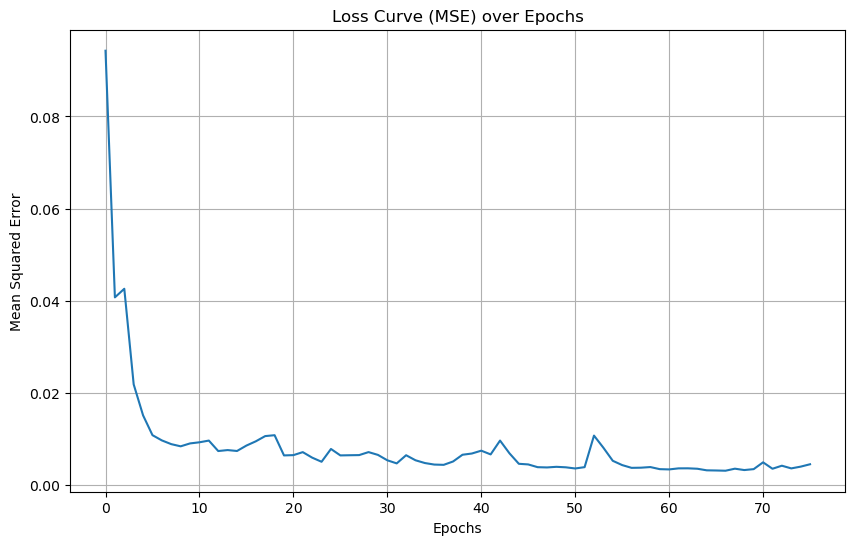

In [223]:
# Preparing the feature matrix and target vector
X = data_final.drop(['Year', 'Area', 'TotalExportValue_Crops'], axis=1)
y = data_final['TotalExportValue_Crops']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(500, 500, 500), (400, 400, 400), (300, 300, 300)],
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
    'max_iter': [300, 500, 700],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01]
}

# Initialize the MLPRegressor
mlp = MLPRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_mlp = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_mlp.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'R^2: {r2}')

# Plotting MSE changes over epochs
plt.figure(figsize=(10, 6))
plt.plot(best_mlp.loss_curve_)
plt.title('Loss Curve (MSE) over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Plotting MAE changes over epochs if possible (MLPRegressor does not track MAE per epoch, only loss)


## Random Search

Preparing the feature matrix and target vector...
Splitting the dataset into training and testing sets...
Defining the parameter grid for RandomizedSearchCV...
Initializing the MLPRegressor with early stopping...
Initializing RandomizedSearchCV...
Fitting the model... This may take a while.
Fitting 2 folds for each of 20 candidates, totalling 40 fits
Model fitting complete.
Retrieving the best model...
Making predictions with the best model...
Calculating performance metrics...
Best Hyperparameters: {'solver': 'adam', 'max_iter': 500, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (300, 300, 300), 'alpha': 0.01, 'activation': 'relu'}
MSE: 0.01128399012283995
RMSE: 0.10622612730792717
MAE: 0.05344576212666934
MAPE: 0.3320455709144347
R^2: 0.9887131326890304
Plotting MSE changes over epochs...


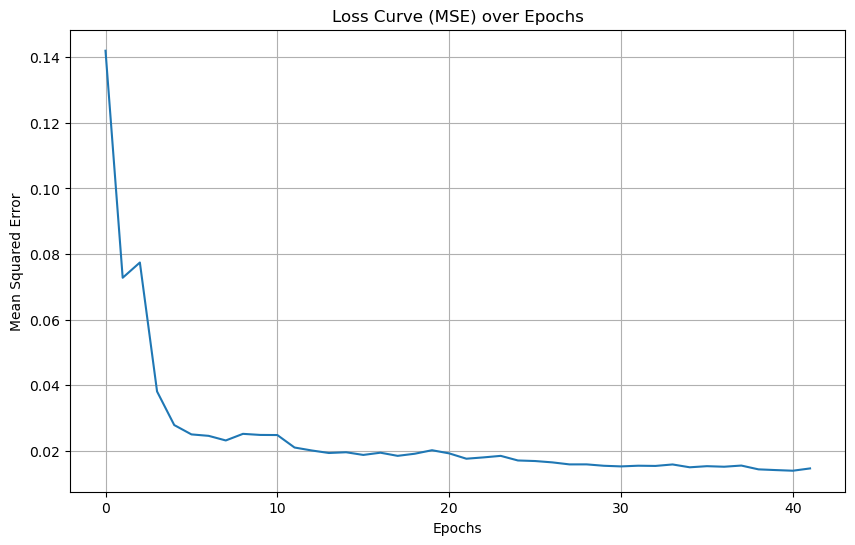

Plotting complete.


In [225]:
# Preparing the feature matrix and target vector
print("Preparing the feature matrix and target vector...")
X = data_final.drop(['Year', 'Area', 'TotalExportValue_Crops'], axis=1)
y = data_final['TotalExportValue_Crops']

# Splitting the dataset into training and testing sets
print("Splitting the dataset into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomizedSearchCV
print("Defining the parameter grid for RandomizedSearchCV...")
param_distributions = {
    'hidden_layer_sizes': [(500, 500, 500), (400, 400, 400), (300, 300, 300)],
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
    'max_iter': [300, 500],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01]
}

# Initialize the MLPRegressor with early stopping
print("Initializing the MLPRegressor with early stopping...")
mlp = MLPRegressor(random_state=42, early_stopping=True, n_iter_no_change=10, validation_fraction=0.1)

# Initialize RandomizedSearchCV
print("Initializing RandomizedSearchCV...")
random_search = RandomizedSearchCV(mlp, param_distributions, n_iter=20, cv=2, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)

# Fit the model
print("Fitting the model... This may take a while.")
random_search.fit(X_train, y_train)
print("Model fitting complete.")

# Get the best model
print("Retrieving the best model...")
best_mlp = random_search.best_estimator_

# Make predictions with the best model
print("Making predictions with the best model...")
y_pred = best_mlp.predict(X_test)

# Calculate performance metrics
print("Calculating performance metrics...")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f'Best Hyperparameters: {random_search.best_params_}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'R^2: {r2}')

# Plotting MSE changes over epochs
print("Plotting MSE changes over epochs...")
plt.figure(figsize=(10, 6))
plt.plot(best_mlp.loss_curve_)
plt.title('Loss Curve (MSE) over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()
print("Plotting complete.")

## Predicted Values with Best Model

### Three Years Only

In [254]:
data = pd.read_csv('data_final.csv') 

Training features:
['TotalImportValue_Crops', 'TotalExportValue_Livestock', 'TotalImportValue_Livestock', 'Exchange_Value_Exchange_Rate', 'Crops total (Emissions CH4) All Crops', 'Crops total (Emissions N2O) All Crops', 'Consumer Prices, Food Indices (2015 = 100)', 'Food price inflation', 'employment_agriculture', 'total_yield_crop_prod', 'Per capita food production variability (constant 2014-2016 thousand int$ per capita)', 'Per capita food supply variability (kcal/cap/day)', 'Political stability and absence of violence/terrorism (index)', 'Average dietary energy supply adequacy (percent) (3-year average)', 'Percent of arable land equipped for irrigation (percent) (3-year average)', 'Total FDI inflows', 'meteorological_year_temp', 'Country area', 'Land area', 'Arable land', 'Cropland', 'Agricultural land', 'Agriculture', 'Permanent crops', 'Permanent meadows and pastures', 'Fungicides and Bactericides_Agricultural Use', 'Herbicides_Agricultural Use', 'Insecticides_Agricultural Use', '

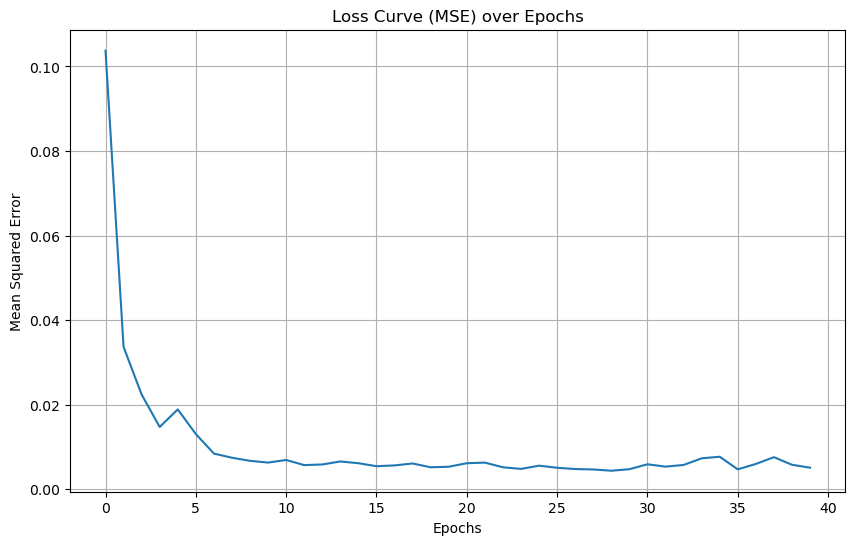

In [255]:
# Create lagged features for the export values
def create_lagged_features(data, lags=3):
    for lag in range(1, lags + 1):
        data[f'TotalExportValue_Crops_lag{lag}'] = data.groupby('Area')['TotalExportValue_Crops'].shift(lag)
    return data.dropna()

data = create_lagged_features(data)

# Split the data into training and future sets based on a specified end year
def split_data(data, train_end_year):
    train_data = data[data['Year'] <= train_end_year]
    future_data = data[data['Year'] > train_end_year]
    return train_data, future_data

# Train the model with predefined best hyperparameters
def train_best_model(train_data):
    X_train = train_data.drop(['Year', 'Area', 'TotalExportValue_Crops'], axis=1)
    y_train = train_data['TotalExportValue_Crops']
    
    # Print training feature information
    print("Training features:")
    print(X_train.columns.tolist())
    print(f"Number of training features: {X_train.shape[1]}")
    
    # Define the best model with known hyperparameters
    best_mlp = MLPRegressor(hidden_layer_sizes=(500, 500, 500), alpha=0.001, max_iter=500, 
                            activation='relu', solver='adam', learning_rate_init=0.001, random_state=42)
    
    # Fit the model
    best_mlp.fit(X_train, y_train)
    
    return best_mlp, X_train.columns.tolist()

# Forecast future values
def forecast_future_values(model, feature_columns, data, start_year, n_years=3):
    last_known_data = data[data['Year'] == start_year].copy()
    forecasted_values = []

    for year in range(1, n_years + 1):
        # Ensure only feature columns are used
        features = last_known_data[feature_columns]
        
        # Select the most recent row for prediction
        latest_row = features.iloc[-1].to_frame().T
        
        # Print debugging information for the selected data
        print(f"last_known_data shape before selection: {last_known_data.shape}")
        print(f"features shape before reshape: {features.shape}")
        
        # Print prediction feature information
        print(f"Prediction features for year {start_year + year}:")
        print(feature_columns)
        print(f"Feature shape for prediction: {latest_row.shape}")
        
        if latest_row.shape[1] != model.n_features_in_:
            raise ValueError(f"Expected {model.n_features_in_} features, but got {latest_row.shape[1]} features.")
        
        predicted_value = model.predict(latest_row)[0]
        forecasted_values.append(predicted_value)

        # Update the last known data for the next prediction
        next_year_data = last_known_data.copy()
        next_year_data['TotalExportValue_Crops'] = predicted_value
        for lag in range(1, 4):
            if f'TotalExportValue_Crops_lag{lag}' in next_year_data.columns:
                next_year_data[f'TotalExportValue_Crops_lag{lag}'] = last_known_data[f'TotalExportValue_Crops_lag{lag-1}'] if lag > 1 else predicted_value
        
        next_year_data['Year'] += 1
        last_known_data = next_year_data[feature_columns + ['Year', 'Area', 'TotalExportValue_Crops']]

    return forecasted_values

# Function to execute the entire process
def execute_forecast(data, train_end_year, predict_years):
    train_data, future_data = split_data(data, train_end_year)
    model, feature_columns = train_best_model(train_data)
    
    start_year = train_end_year
    forecasted_values = forecast_future_values(model, feature_columns, data, start_year, predict_years)
    print(f'Forecasted export values for the years {start_year + 1} to {start_year + predict_years}: {forecasted_values}')
    
    if not future_data.empty:
        future_data_features = future_data[feature_columns]
        future_data_pred = model.predict(future_data_features)
        mse_future = mean_squared_error(future_data['TotalExportValue_Crops'], future_data_pred)
        rmse_future = np.sqrt(mse_future)
        mae_future = mean_absolute_error(future_data['TotalExportValue_Crops'], future_data_pred)
        mape_future = mean_absolute_percentage_error(future_data['TotalExportValue_Crops'], future_data_pred)
        r2_future = r2_score(future_data['TotalExportValue_Crops'], future_data_pred)
        
        print(f'MSE (future): {mse_future}')
        print(f'RMSE (future): {rmse_future}')
        print(f'MAE (future): {mae_future}')
        print(f'MAPE (future): {mape_future}')
        print(f'R^2 (future): {r2_future}')
    
    # Plotting MSE changes over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(model.loss_curve_)
    plt.title('Loss Curve (MSE) over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.grid(True)
    plt.show()

# Example usage
execute_forecast(data, train_end_year=2018, predict_years=3)


### All Countries, 3 years

In [260]:
data = pd.read_csv('data_final.csv') 

Training features:
['TotalImportValue_Crops', 'TotalExportValue_Livestock', 'TotalImportValue_Livestock', 'Exchange_Value_Exchange_Rate', 'Crops total (Emissions CH4) All Crops', 'Crops total (Emissions N2O) All Crops', 'Consumer Prices, Food Indices (2015 = 100)', 'Food price inflation', 'employment_agriculture', 'total_yield_crop_prod', 'Per capita food production variability (constant 2014-2016 thousand int$ per capita)', 'Per capita food supply variability (kcal/cap/day)', 'Political stability and absence of violence/terrorism (index)', 'Average dietary energy supply adequacy (percent) (3-year average)', 'Percent of arable land equipped for irrigation (percent) (3-year average)', 'Total FDI inflows', 'meteorological_year_temp', 'Country area', 'Land area', 'Arable land', 'Cropland', 'Agricultural land', 'Agriculture', 'Permanent crops', 'Permanent meadows and pastures', 'Fungicides and Bactericides_Agricultural Use', 'Herbicides_Agricultural Use', 'Insecticides_Agricultural Use', '

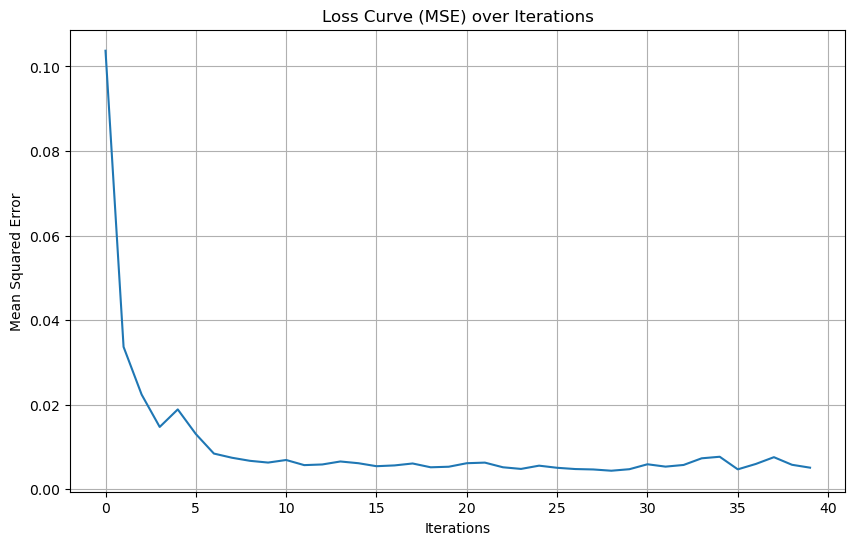

In [261]:
# Create lagged features for the export values
def create_lagged_features(data, lags=3):
    for lag in range(1, lags + 1):
        data[f'TotalExportValue_Crops_lag{lag}'] = data.groupby('Area')['TotalExportValue_Crops'].shift(lag)
    return data.dropna()

data = create_lagged_features(data)

# Split the data into training and future sets based on a specified end year
def split_data(data, train_end_year):
    train_data = data[data['Year'] <= train_end_year]
    future_data = data[data['Year'] > train_end_year]
    return train_data, future_data

# Train the model with predefined best hyperparameters
def train_best_model(train_data):
    X_train = train_data.drop(['Year', 'Area', 'TotalExportValue_Crops'], axis=1)
    y_train = train_data['TotalExportValue_Crops']
    
    # Print training feature information
    print("Training features:")
    print(X_train.columns.tolist())
    print(f"Number of training features: {X_train.shape[1]}")
    
    # Define the best model with known hyperparameters
    best_mlp = MLPRegressor(hidden_layer_sizes=(500, 500, 500), alpha=0.001, max_iter=500, 
                            activation='relu', solver='adam', learning_rate_init=0.001, random_state=42)
    
    # Fit the model
    best_mlp.fit(X_train, y_train)
    
    return best_mlp, X_train.columns.tolist()

# Forecast future values for all countries
def forecast_future_values_all_countries(model, feature_columns, data, start_year, n_years=3):
    areas = data['Area'].unique()
    forecasted_results = []

    for area in areas:
        last_known_data = data[(data['Area'] == area) & (data['Year'] == start_year)].copy()
        
        if last_known_data.empty:
            print(f"No data available for {area} in {start_year}, skipping.")
            continue
        
        forecasted_values = []

        for year in range(1, n_years + 1):
            # Ensure only feature columns are used
            features = last_known_data[feature_columns]
            
            # Select the most recent row for prediction
            latest_row = features.iloc[-1].to_frame().T
            
            # Perform the prediction
            predicted_value = model.predict(latest_row)[0]
            forecasted_values.append({
                'Area': area,
                'Year': start_year + year,
                'Predicted_TotalExportValue_Crops': predicted_value
            })

            # Update the last known data for the next prediction
            next_year_data = last_known_data.copy()
            next_year_data['TotalExportValue_Crops'] = predicted_value
            for lag in range(1, 4):
                if f'TotalExportValue_Crops_lag{lag}' in next_year_data.columns:
                    next_year_data[f'TotalExportValue_Crops_lag{lag}'] = last_known_data[f'TotalExportValue_Crops_lag{lag-1}'] if lag > 1 else predicted_value
            
            next_year_data['Year'] += 1
            last_known_data = next_year_data[feature_columns + ['Year', 'Area', 'TotalExportValue_Crops']]

        forecasted_results.extend(forecasted_values)
    
    return pd.DataFrame(forecasted_results)

# Function to execute the entire process
def execute_forecast(data, train_end_year, predict_years):
    train_data, future_data = split_data(data, train_end_year)
    model, feature_columns = train_best_model(train_data)
    
    start_year = train_end_year
    forecasted_values_df = forecast_future_values_all_countries(model, feature_columns, data, start_year, predict_years)
    
    print(f'Forecasted export values for the years {start_year + 1} to {start_year + predict_years} for all countries:')
    print(forecasted_values_df)
    
    if not future_data.empty:
        future_data_features = future_data[feature_columns]
        future_data_pred = model.predict(future_data_features)
        mse_future = mean_squared_error(future_data['TotalExportValue_Crops'], future_data_pred)
        rmse_future = np.sqrt(mse_future)
        mae_future = mean_absolute_error(future_data['TotalExportValue_Crops'], future_data_pred)
        mape_future = mean_absolute_percentage_error(future_data['TotalExportValue_Crops'], future_data_pred)
        r2_future = r2_score(future_data['TotalExportValue_Crops'], future_data_pred)
        
        print(f'MSE (future): {mse_future}')
        print(f'RMSE (future): {rmse_future}')
        print(f'MAE (future): {mae_future}')
        print(f'MAPE (future): {mape_future}')
        print(f'R^2 (future): {r2_future}')
    
    # Plotting MSE changes over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(model.loss_curve_)
    plt.title('Loss Curve (MSE) over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.grid(True)
    plt.show()

    return forecasted_values_df

# Example usage
forecasted_df = execute_forecast(data, train_end_year=2018, predict_years=3)


In [262]:
forecasted_df.head()

,Area,Year,Predicted_TotalExportValue_Crops
0,Afghanistan,2019,-0.331915
1,Afghanistan,2020,-0.330197
2,Afghanistan,2021,-0.328227
3,Albania,2019,-0.394366
4,Albania,2020,-0.397336


### All Countries, 3 Years, True Labels

In [263]:
data = pd.read_csv('data_final.csv') 

Training features:
['TotalImportValue_Crops', 'TotalExportValue_Livestock', 'TotalImportValue_Livestock', 'Exchange_Value_Exchange_Rate', 'Crops total (Emissions CH4) All Crops', 'Crops total (Emissions N2O) All Crops', 'Consumer Prices, Food Indices (2015 = 100)', 'Food price inflation', 'employment_agriculture', 'total_yield_crop_prod', 'Per capita food production variability (constant 2014-2016 thousand int$ per capita)', 'Per capita food supply variability (kcal/cap/day)', 'Political stability and absence of violence/terrorism (index)', 'Average dietary energy supply adequacy (percent) (3-year average)', 'Percent of arable land equipped for irrigation (percent) (3-year average)', 'Total FDI inflows', 'meteorological_year_temp', 'Country area', 'Land area', 'Arable land', 'Cropland', 'Agricultural land', 'Agriculture', 'Permanent crops', 'Permanent meadows and pastures', 'Fungicides and Bactericides_Agricultural Use', 'Herbicides_Agricultural Use', 'Insecticides_Agricultural Use', '

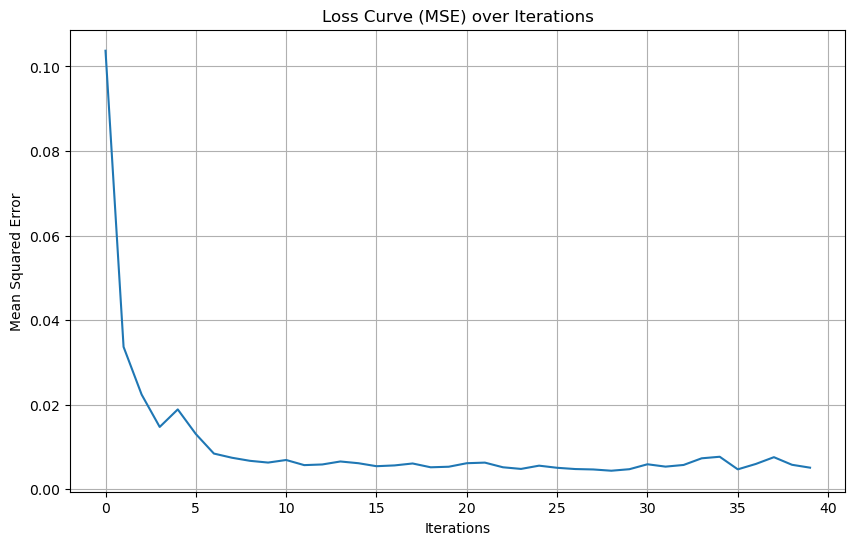

In [264]:
# Create lagged features for the export values
def create_lagged_features(data, lags=3):
    for lag in range(1, lags + 1):
        data[f'TotalExportValue_Crops_lag{lag}'] = data.groupby('Area')['TotalExportValue_Crops'].shift(lag)
    return data.dropna()

data = create_lagged_features(data)

# Split the data into training and future sets based on a specified end year
def split_data(data, train_end_year):
    train_data = data[data['Year'] <= train_end_year]
    future_data = data[data['Year'] > train_end_year]
    return train_data, future_data

# Train the model with predefined best hyperparameters
def train_best_model(train_data):
    X_train = train_data.drop(['Year', 'Area', 'TotalExportValue_Crops'], axis=1)
    y_train = train_data['TotalExportValue_Crops']
    
    # Print training feature information
    print("Training features:")
    print(X_train.columns.tolist())
    print(f"Number of training features: {X_train.shape[1]}")
    
    # Define the best model with known hyperparameters
    best_mlp = MLPRegressor(hidden_layer_sizes=(500, 500, 500), alpha=0.001, max_iter=500, 
                            activation='relu', solver='adam', learning_rate_init=0.001, random_state=42)
    
    # Fit the model
    best_mlp.fit(X_train, y_train)
    
    return best_mlp, X_train.columns.tolist()

# Forecast future values for all countries
def forecast_future_values_all_countries(model, feature_columns, data, start_year, n_years=3):
    areas = data['Area'].unique()
    forecasted_results = []

    for area in areas:
        last_known_data = data[(data['Area'] == area) & (data['Year'] == start_year)].copy()
        
        if last_known_data.empty:
            print(f"No data available for {area} in {start_year}, skipping.")
            continue
        
        forecasted_values = []

        for year in range(1, n_years + 1):
            # Ensure only feature columns are used
            features = last_known_data[feature_columns]
            
            # Select the most recent row for prediction
            latest_row = features.iloc[-1].to_frame().T
            
            # Perform the prediction
            predicted_value = model.predict(latest_row)[0]
            forecasted_values.append({
                'Area': area,
                'Year': start_year + year,
                'Predicted_TotalExportValue_Crops': predicted_value
            })

            # Update the last known data for the next prediction
            next_year_data = last_known_data.copy()
            next_year_data['TotalExportValue_Crops'] = predicted_value
            for lag in range(1, 4):
                if f'TotalExportValue_Crops_lag{lag}' in next_year_data.columns:
                    next_year_data[f'TotalExportValue_Crops_lag{lag}'] = last_known_data[f'TotalExportValue_Crops_lag{lag-1}'] if lag > 1 else predicted_value
            
            next_year_data['Year'] += 1
            last_known_data = next_year_data[feature_columns + ['Year', 'Area', 'TotalExportValue_Crops']]

        forecasted_results.extend(forecasted_values)
    
    return pd.DataFrame(forecasted_results)

# Function to execute the entire process
def execute_forecast(data, train_end_year, predict_years):
    train_data, future_data = split_data(data, train_end_year)
    model, feature_columns = train_best_model(train_data)
    
    start_year = train_end_year
    forecasted_values_df = forecast_future_values_all_countries(model, feature_columns, data, start_year, predict_years)
    
    # Merge forecasted values with true values
    true_values = data[(data['Year'] > train_end_year) & (data['Year'] <= train_end_year + predict_years)]
    comparison_df = pd.merge(forecasted_values_df, true_values[['Area', 'Year', 'TotalExportValue_Crops']],
                             on=['Area', 'Year'], how='left', suffixes=('_Predicted', '_True'))
    
    print(f'Comparison of forecasted and true export values for the years {start_year + 1} to {start_year + predict_years} for all countries:')
    print(comparison_df)
    
    if not future_data.empty:
        future_data_features = future_data[feature_columns]
        future_data_pred = model.predict(future_data_features)
        mse_future = mean_squared_error(future_data['TotalExportValue_Crops'], future_data_pred)
        rmse_future = np.sqrt(mse_future)
        mae_future = mean_absolute_error(future_data['TotalExportValue_Crops'], future_data_pred)
        mape_future = mean_absolute_percentage_error(future_data['TotalExportValue_Crops'], future_data_pred)
        r2_future = r2_score(future_data['TotalExportValue_Crops'], future_data_pred)
        
        print(f'MSE (future): {mse_future}')
        print(f'RMSE (future): {rmse_future}')
        print(f'MAE (future): {mae_future}')
        print(f'MAPE (future): {mape_future}')
        print(f'R^2 (future): {r2_future}')
    
    # Plotting MSE changes over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(model.loss_curve_)
    plt.title('Loss Curve (MSE) over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.grid(True)
    plt.show()

    return comparison_df

# Example usage
comparison_df = execute_forecast(data, train_end_year=2018, predict_years=3)


In [265]:
comparison_df.head()

,Area,Year,Predicted_TotalExportValue_Crops,TotalExportValue_Crops
0,Afghanistan,2019,-0.331915,-0.318095
1,Afghanistan,2020,-0.330197,-0.312866
2,Afghanistan,2021,-0.328227,-0.306541
3,Albania,2019,-0.394366,-0.375517
4,Albania,2020,-0.397336,-0.371758


### All Countries, 3rd Year, True Labels

In [266]:
data = pd.read_csv('data_final.csv') 

Training features:
['TotalImportValue_Crops', 'TotalExportValue_Livestock', 'TotalImportValue_Livestock', 'Exchange_Value_Exchange_Rate', 'Crops total (Emissions CH4) All Crops', 'Crops total (Emissions N2O) All Crops', 'Consumer Prices, Food Indices (2015 = 100)', 'Food price inflation', 'employment_agriculture', 'total_yield_crop_prod', 'Per capita food production variability (constant 2014-2016 thousand int$ per capita)', 'Per capita food supply variability (kcal/cap/day)', 'Political stability and absence of violence/terrorism (index)', 'Average dietary energy supply adequacy (percent) (3-year average)', 'Percent of arable land equipped for irrigation (percent) (3-year average)', 'Total FDI inflows', 'meteorological_year_temp', 'Country area', 'Land area', 'Arable land', 'Cropland', 'Agricultural land', 'Agriculture', 'Permanent crops', 'Permanent meadows and pastures', 'Fungicides and Bactericides_Agricultural Use', 'Herbicides_Agricultural Use', 'Insecticides_Agricultural Use', '

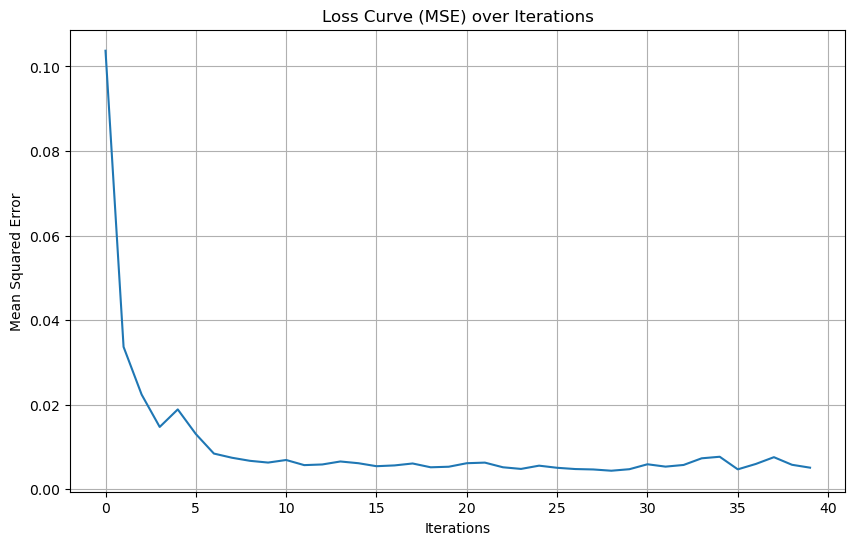

In [267]:
# Create lagged features for the export values
def create_lagged_features(data, lags=3):
    for lag in range(1, lags + 1):
        data[f'TotalExportValue_Crops_lag{lag}'] = data.groupby('Area')['TotalExportValue_Crops'].shift(lag)
    return data.dropna()

data = create_lagged_features(data)

# Split the data into training and future sets based on a specified end year
def split_data(data, train_end_year):
    train_data = data[data['Year'] <= train_end_year]
    future_data = data[data['Year'] > train_end_year]
    return train_data, future_data

# Train the model with predefined best hyperparameters
def train_best_model(train_data):
    X_train = train_data.drop(['Year', 'Area', 'TotalExportValue_Crops'], axis=1)
    y_train = train_data['TotalExportValue_Crops']
    
    # Print training feature information
    print("Training features:")
    print(X_train.columns.tolist())
    print(f"Number of training features: {X_train.shape[1]}")
    
    # Define the best model with known hyperparameters
    best_mlp = MLPRegressor(hidden_layer_sizes=(500, 500, 500), alpha=0.001, max_iter=500, 
                            activation='relu', solver='adam', learning_rate_init=0.001, random_state=42)
    
    # Fit the model
    best_mlp.fit(X_train, y_train)
    
    return best_mlp, X_train.columns.tolist()

# Forecast future value for all countries for a specific year
def forecast_specific_year(model, feature_columns, data, start_year, predict_year):
    areas = data['Area'].unique()
    forecasted_results = []

    for area in areas:
        last_known_data = data[(data['Area'] == area) & (data['Year'] == start_year)].copy()
        
        if last_known_data.empty:
            print(f"No data available for {area} in {start_year}, skipping.")
            continue
        
        # Ensure only feature columns are used
        features = last_known_data[feature_columns]
        
        # Select the most recent row for prediction
        latest_row = features.iloc[-1].to_frame().T
        
        # Perform the prediction
        predicted_value = model.predict(latest_row)[0]
        forecasted_results.append({
            'Area': area,
            'Year': predict_year,
            'Predicted_TotalExportValue_Crops': predicted_value
        })

    return pd.DataFrame(forecasted_results)

# Function to execute the entire process
def execute_forecast(data, train_end_year, predict_year):
    train_data, future_data = split_data(data, train_end_year)
    model, feature_columns = train_best_model(train_data)
    
    # Forecast for the specific future year
    forecasted_values_df = forecast_specific_year(model, feature_columns, data, train_end_year, predict_year)
    
    # Merge forecasted values with true values
    true_values = data[data['Year'] == predict_year]
    comparison_df = pd.merge(forecasted_values_df, true_values[['Area', 'Year', 'TotalExportValue_Crops']],
                             on=['Area', 'Year'], how='left', suffixes=('_Predicted', '_True'))
    
    print(f'Comparison of forecasted and true export values for the year {predict_year} for all countries:')
    print(comparison_df)
    
    if not future_data.empty:
        future_data_features = future_data[feature_columns]
        future_data_pred = model.predict(future_data_features)
        mse_future = mean_squared_error(future_data['TotalExportValue_Crops'], future_data_pred)
        rmse_future = np.sqrt(mse_future)
        mae_future = mean_absolute_error(future_data['TotalExportValue_Crops'], future_data_pred)
        mape_future = mean_absolute_percentage_error(future_data['TotalExportValue_Crops'], future_data_pred)
        r2_future = r2_score(future_data['TotalExportValue_Crops'], future_data_pred)
        
        print(f'MSE (future): {mse_future}')
        print(f'RMSE (future): {rmse_future}')
        print(f'MAE (future): {mae_future}')
        print(f'MAPE (future): {mape_future}')
        print(f'R^2 (future): {r2_future}')
    
    # Plotting MSE changes over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(model.loss_curve_)
    plt.title('Loss Curve (MSE) over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.grid(True)
    plt.show()

    return comparison_df

# Example usage
comparison_df = execute_forecast(data, train_end_year=2018, predict_year=2021)


In [268]:
comparison_df.head()

,Area,Year,Predicted_TotalExportValue_Crops,TotalExportValue_Crops
0,Afghanistan,2021,-0.331915,-0.306541
1,Albania,2021,-0.394366,-0.371869
2,Algeria,2021,-0.333886,-0.340849
3,Angola,2021,-0.348731,-0.380256
4,Antigua and Barbuda,2021,-0.389639,-0.383639


## Predicted Values with Random Search

### True Labels

In [269]:
data = pd.read_csv('data_final.csv') 

Training features:
['TotalImportValue_Crops', 'TotalExportValue_Livestock', 'TotalImportValue_Livestock', 'Exchange_Value_Exchange_Rate', 'Crops total (Emissions CH4) All Crops', 'Crops total (Emissions N2O) All Crops', 'Consumer Prices, Food Indices (2015 = 100)', 'Food price inflation', 'employment_agriculture', 'total_yield_crop_prod', 'Per capita food production variability (constant 2014-2016 thousand int$ per capita)', 'Per capita food supply variability (kcal/cap/day)', 'Political stability and absence of violence/terrorism (index)', 'Average dietary energy supply adequacy (percent) (3-year average)', 'Percent of arable land equipped for irrigation (percent) (3-year average)', 'Total FDI inflows', 'meteorological_year_temp', 'Country area', 'Land area', 'Arable land', 'Cropland', 'Agricultural land', 'Agriculture', 'Permanent crops', 'Permanent meadows and pastures', 'Fungicides and Bactericides_Agricultural Use', 'Herbicides_Agricultural Use', 'Insecticides_Agricultural Use', '

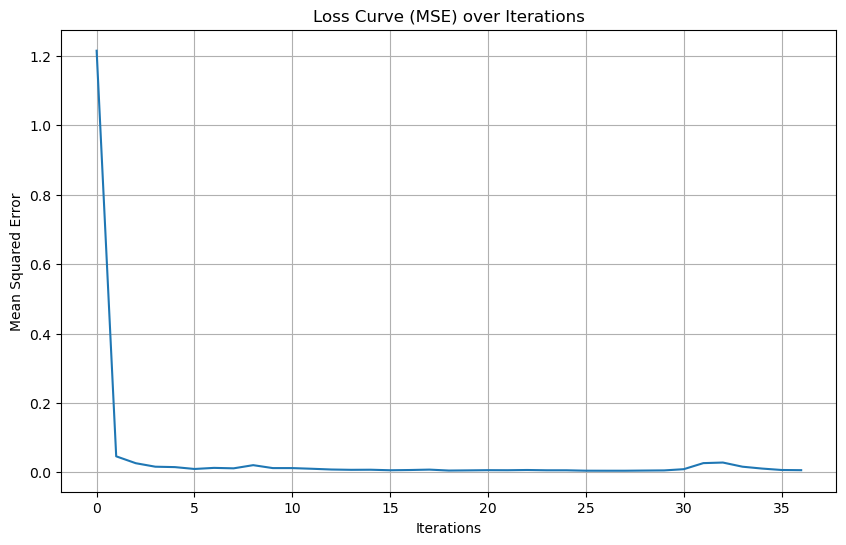

In [270]:
# Create lagged features for the export values
def create_lagged_features(data, lags=3):
    for lag in range(1, lags + 1):
        data[f'TotalExportValue_Crops_lag{lag}'] = data.groupby('Area')['TotalExportValue_Crops'].shift(lag)
    return data.dropna()

data = create_lagged_features(data)

# Split the data into training and future sets based on a specified end year
def split_data(data, train_end_year):
    train_data = data[data['Year'] <= train_end_year]
    future_data = data[data['Year'] > train_end_year]
    return train_data, future_data

# Train the model using RandomizedSearchCV
def train_model_with_random_search(train_data):
    X_train = train_data.drop(['Year', 'Area', 'TotalExportValue_Crops'], axis=1)
    y_train = train_data['TotalExportValue_Crops']
    
    # Print training feature information
    print("Training features:")
    print(X_train.columns.tolist())
    print(f"Number of training features: {X_train.shape[1]}")
    
    # Define the parameter grid for random search
    param_dist = {
        'hidden_layer_sizes': [(randint.rvs(100, 600, size=3)) for _ in range(10)],
        'alpha': uniform(0.0001, 0.01),
        'max_iter': [300, 500, 700],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'learning_rate_init': uniform(0.001, 0.01)
    }
    
    # Define the MLPRegressor model
    mlp = MLPRegressor(random_state=42)
    
    # Perform RandomizedSearchCV
    random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=50, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)
    
    # Get the best model
    best_mlp = random_search.best_estimator_
    print(f"Best parameters found: {random_search.best_params_}")
    
    return best_mlp, X_train.columns.tolist()

# Forecast future value for all countries for a specific year
def forecast_specific_year(model, feature_columns, data, start_year, predict_year):
    areas = data['Area'].unique()
    forecasted_results = []

    for area in areas:
        last_known_data = data[(data['Area'] == area) & (data['Year'] == start_year)].copy()
        
        if last_known_data.empty:
            print(f"No data available for {area} in {start_year}, skipping.")
            continue
        
        # Ensure only feature columns are used
        features = last_known_data[feature_columns]
        
        # Select the most recent row for prediction
        latest_row = features.iloc[-1].to_frame().T
        
        # Perform the prediction
        predicted_value = model.predict(latest_row)[0]
        forecasted_results.append({
            'Area': area,
            'Year': predict_year,
            'Predicted_TotalExportValue_Crops': predicted_value
        })

    return pd.DataFrame(forecasted_results)

# Function to execute the entire process
def execute_forecast(data, train_end_year, predict_year):
    train_data, future_data = split_data(data, train_end_year)
    model, feature_columns = train_model_with_random_search(train_data)
    
    # Forecast for the specific future year
    forecasted_values_df = forecast_specific_year(model, feature_columns, data, train_end_year, predict_year)
    
    # Merge forecasted values with true values
    true_values = data[data['Year'] == predict_year]
    comparison_df = pd.merge(forecasted_values_df, true_values[['Area', 'Year', 'TotalExportValue_Crops']],
                             on=['Area', 'Year'], how='left', suffixes=('_Predicted', '_True'))
    
    print(f'Comparison of forecasted and true export values for the year {predict_year} for all countries:')
    print(comparison_df)
    
    if not future_data.empty:
        future_data_features = future_data[feature_columns]
        future_data_pred = model.predict(future_data_features)
        mse_future = mean_squared_error(future_data['TotalExportValue_Crops'], future_data_pred)
        rmse_future = np.sqrt(mse_future)
        mae_future = mean_absolute_error(future_data['TotalExportValue_Crops'], future_data_pred)
        mape_future = mean_absolute_percentage_error(future_data['TotalExportValue_Crops'], future_data_pred)
        r2_future = r2_score(future_data['TotalExportValue_Crops'], future_data_pred)
        
        print(f'MSE (future): {mse_future}')
        print(f'RMSE (future): {rmse_future}')
        print(f'MAE (future): {mae_future}')
        print(f'MAPE (future): {mape_future}')
        print(f'R^2 (future): {r2_future}')
    
    # Plotting MSE changes over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(model.loss_curve_)
    plt.title('Loss Curve (MSE) over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.grid(True)
    plt.show()

    return comparison_df

# Example usage
comparison_df = execute_forecast(data, train_end_year=2018, predict_year=2021)


In [271]:
comparison_df.head()

,Area,Year,Predicted_TotalExportValue_Crops,TotalExportValue_Crops
0,Afghanistan,2021,-0.334352,-0.306541
1,Albania,2021,-0.345583,-0.371869
2,Algeria,2021,-0.338588,-0.340849
3,Angola,2021,-0.363137,-0.380256
4,Antigua and Barbuda,2021,-0.390273,-0.383639


In [272]:
comparison_df.to_csv('comparison_df.csv', index=False)

### True Labels, Data Instances

In [4]:
data = pd.read_csv('data_final.csv') 

Total number of instances: 3704
Number of training instances: 3116
Number of future instances: 588
Training features:
['TotalImportValue_Crops', 'TotalExportValue_Livestock', 'TotalImportValue_Livestock', 'Exchange_Value_Exchange_Rate', 'Crops total (Emissions CH4) All Crops', 'Crops total (Emissions N2O) All Crops', 'Consumer Prices, Food Indices (2015 = 100)', 'Food price inflation', 'employment_agriculture', 'total_yield_crop_prod', 'Per capita food production variability (constant 2014-2016 thousand int$ per capita)', 'Per capita food supply variability (kcal/cap/day)', 'Political stability and absence of violence/terrorism (index)', 'Average dietary energy supply adequacy (percent) (3-year average)', 'Percent of arable land equipped for irrigation (percent) (3-year average)', 'Total FDI inflows', 'meteorological_year_temp', 'Country area', 'Land area', 'Arable land', 'Cropland', 'Agricultural land', 'Agriculture', 'Permanent crops', 'Permanent meadows and pastures', 'Fungicides an

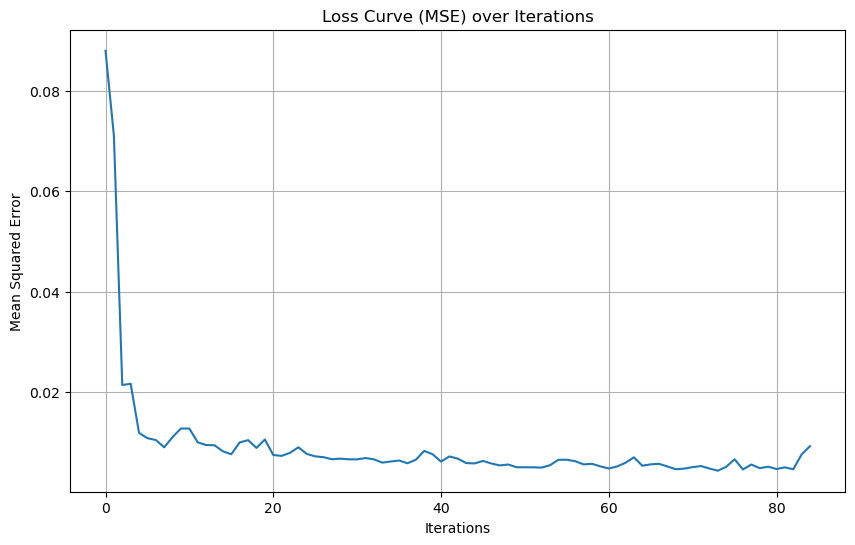

In [5]:
# Create lagged features for the export values
def create_lagged_features(data, lags=3):
    for lag in range(1, lags + 1):
        data[f'TotalExportValue_Crops_lag{lag}'] = data.groupby('Area')['TotalExportValue_Crops'].shift(lag)
    return data.dropna()

data = create_lagged_features(data)

# Split the data into training and future sets based on a specified end year
def split_data(data, train_end_year):
    train_data = data[data['Year'] <= train_end_year]
    future_data = data[data['Year'] > train_end_year]
    
    print(f"Total number of instances: {len(data)}")
    print(f"Number of training instances: {len(train_data)}")
    print(f"Number of future instances: {len(future_data)}")
    
    return train_data, future_data

# Custom function to inspect cross-validation folds
def inspect_cv_splits(X, y, cv):
    fold = 1
    for train_index, test_index in cv.split(X, y):
        print(f"Fold {fold}:")
        print(f"  Training instances: {len(train_index)}")
        print(f"  Validation instances: {len(test_index)}")
        fold += 1

# Train the model using RandomizedSearchCV
def train_model_with_random_search(train_data):
    X_train = train_data.drop(['Year', 'Area', 'TotalExportValue_Crops'], axis=1)
    y_train = train_data['TotalExportValue_Crops']
    
    # Print training feature information
    print("Training features:")
    print(X_train.columns.tolist())
    print(f"Number of training features: {X_train.shape[1]}")
    
    # Define the parameter grid for random search
    param_dist = {
        'hidden_layer_sizes': [(randint.rvs(100, 600, size=3)) for _ in range(10)],
        'alpha': uniform(0.0001, 0.01),
        'max_iter': [300, 500, 700],
        'activation': ['relu'],
        'solver': ['adam'],
        'learning_rate_init': uniform(0.001, 0.01)
    }

   
    # Define the MLPRegressor model
    mlp = MLPRegressor(random_state=42)
    
    # Define cross-validation strategy
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    
    # Inspect the cross-validation splits
    inspect_cv_splits(X_train, y_train, kf)
    
    # Perform RandomizedSearchCV
    random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=50, cv=kf, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)
    
    # Get the best model
    best_mlp = random_search.best_estimator_
    print(f"Best parameters found: {random_search.best_params_}")
    
    return best_mlp, X_train.columns.tolist()

# Forecast future value for all countries for a specific year
def forecast_specific_year(model, feature_columns, data, start_year, predict_year):
    areas = data['Area'].unique()
    forecasted_results = []

    for area in areas:
        last_known_data = data[(data['Area'] == area) & (data['Year'] == start_year)].copy()
        
        if last_known_data.empty:
            print(f"No data available for {area} in {start_year}, skipping.")
            continue
        
        # Ensure only feature columns are used
        features = last_known_data[feature_columns]
        
        # Select the most recent row for prediction
        latest_row = features.iloc[-1].to_frame().T
        
        # Perform the prediction
        predicted_value = model.predict(latest_row)[0]
        forecasted_results.append({
            'Area': area,
            'Year': predict_year,
            'Predicted_TotalExportValue_Crops': predicted_value
        })

    return pd.DataFrame(forecasted_results)

# Function to execute the entire process
def execute_forecast(data, train_end_year, predict_year):
    train_data, future_data = split_data(data, train_end_year)
    model, feature_columns = train_model_with_random_search(train_data)
    
    # Forecast for the specific future year
    forecasted_values_df = forecast_specific_year(model, feature_columns, data, train_end_year, predict_year)
    
    # Merge forecasted values with true values
    true_values = data[data['Year'] == predict_year]
    comparison_df = pd.merge(forecasted_values_df, true_values[['Area', 'Year', 'TotalExportValue_Crops']],
                             on=['Area', 'Year'], how='left', suffixes=('_Predicted', '_True'))
    
    print(f'Comparison of forecasted and true export values for the year {predict_year} for all countries:')
    print(comparison_df)
    
    if not future_data.empty:
        future_data_features = future_data[feature_columns]
        future_data_pred = model.predict(future_data_features)
        mse_future = mean_squared_error(future_data['TotalExportValue_Crops'], future_data_pred)
        rmse_future = np.sqrt(mse_future)
        mae_future = mean_absolute_error(future_data['TotalExportValue_Crops'], future_data_pred)
        mape_future = mean_absolute_percentage_error(future_data['TotalExportValue_Crops'], future_data_pred)
        r2_future = r2_score(future_data['TotalExportValue_Crops'], future_data_pred)
        
        print(f'MSE (future): {mse_future}')
        print(f'RMSE (future): {rmse_future}')
        print(f'MAE (future): {mae_future}')
        print(f'MAPE (future): {mape_future}')
        print(f'R^2 (future): {r2_future}')
    
    # Plotting MSE changes over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(model.loss_curve_)
    plt.title('Loss Curve (MSE) over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.grid(True)
    plt.show()

    return comparison_df

# Example usage
comparison_df = execute_forecast(data, train_end_year=2018, predict_year=2021)


In [6]:
comparison_df.to_csv('comparison_df2.csv', index=False)